In [ ]:
import mne 
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
from libs.preprocessing_lib import EcogReader, prepare_condition_ts, parcellation_to_indices
from mne.time_frequency import psd_array_multitaper, psd_array_welch, csd_array_multitaper 

In [4]:
# Make condition specific time series (epoched)
subject = 'AnRa'
stage= 'preprocessed'
matlab = False
decim = 2
preprocessed_suffix = '_hfb_continuous_raw.fif'
conditions = ['Rest', 'Face', 'Place']
sfreq = 500/decim
data_path = Path('~','projects', 'cifar', 'data').expanduser()

ts = prepare_condition_ts(data_path, subject=subject, stage=stage, matlab = matlab,
                     preprocessed_suffix=preprocessed_suffix, decim=decim)

Opening raw data file /home/guime/projects/cifar/data/derivatives/AnRa/ieeg/AnRa_hfb_continuous_raw.fif...
    Range : 0 ... 348287 =      0.000 ...   696.574 secs
Ready.
Reading 0 ... 348287  =      0.000 ...   696.574 secs...
Not setting metadata
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
Loading data for 200 events and 1126 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Used Annotations descriptions: ['-1', '-2', 'Face010', 'Face020', 'Face030', 'Face040', 'Face050', 'Face060', 'Face070', 'Face110', 'Face120', 'Face130', 'Face140', 'Face150', 'Face160', 'Face170', 'Place010', 'Place020', 'Place030', 'Place040', 'Place050', 'Place060', 'Place070', 'Place110', 'Place120', 'Place130', 'Place140', 'Place150', 'Place160', 'Place170', 'boundary']
Not setting metadata
Not setting m

/home/guime/projects/cifar/src/preprocessing_lib.py:907: RuntimeWarning: The measurement information indicates a low-pass frequency of 250 Hz. The decim=2 parameter will result in a sampling frequency of 250 Hz, which can cause aliasing artifacts.
  epoch = epoch.copy().decimate(decim)
/home/guime/projects/cifar/src/preprocessing_lib.py:907: RuntimeWarning: The measurement information indicates a low-pass frequency of 250 Hz. The decim=2 parameter will result in a sampling frequency of 250 Hz, which can cause aliasing artifacts.
  epoch = epoch.copy().decimate(decim)
/home/guime/projects/cifar/src/preprocessing_lib.py:907: RuntimeWarning: The measurement information indicates a low-pass frequency of 250 Hz. The decim=2 parameter will result in a sampling frequency of 250 Hz, which can cause aliasing artifacts.
  epoch = epoch.copy().decimate(decim)
/home/guime/projects/cifar/src/preprocessing_lib.py:896: RuntimeWarning: tmin is not in epochs time interval. tmin is set to epochs.tmin
  

In [7]:
# Get indices associated with functional group
reader = EcogReader(data_path, subject=subject)
df_visual = reader.read_channels_info(fname='visual_channels.csv')
indices = parcellation_to_indices(df_visual, parcellation='group', matlab=False)
group = list(indices.keys())
group

{'F': [0, 1, 6, 9], 'O': [2, 7, 8, 10], 'R': [3, 4, 5]}

    Using multitaper spectrum estimation with 19 DPSS windows
    Using multitaper spectrum estimation with 19 DPSS windows
    Using multitaper spectrum estimation with 19 DPSS windows


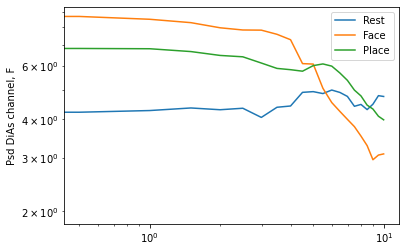

In [86]:
# Average over functional groups Multitaper
g = 'F'
idx = indices[g]
for c in conditions:
    x = ts[c]
    (n,m,N) = x.shape
    x = np.transpose(x, (2,0,1))
    psds, freqs = psd_array_multitaper(x, sfreq = sfreq, fmax=10, bandwidth=10)
    s = psds[0]
    sg = np.mean(s[idx,:],0)
    plt.plot(freqs, sg, label=c)
    plt.yscale('log')
    plt.xscale('log')
    plt.legend()
    plt.ylabel(f'Psd {subject} channel, {g}')

Effective window size : 0.800 (s)
Effective window size : 0.800 (s)
Effective window size : 0.800 (s)


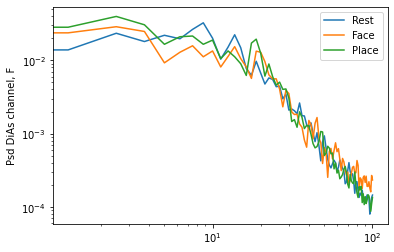

In [85]:
# Average over functional groups Welch method
g = 'F'
idx = indices[g]
for c in conditions:
    x = ts[c]
    (n,m,N) = x.shape
    x = np.transpose(x, (2,0,1))
    psds, freqs = psd_array_welch(x, sfreq, fmin=0, fmax=100, n_fft=200, n_overlap=50)
    s = psds[0]
    sg = np.mean(s[idx,:],0)
    plt.plot(freqs, sg, label=c)
    plt.yscale('log')
    plt.xscale('log')
    plt.legend()
    plt.ylabel(f'Psd {subject} channel, {g}')


In [ ]:
def ts_to_psd(ts, indices, condition='Face', sfreq = 250, fmax=100, bandwidth=6, 
              group='F'):
    """"
    Compute spectral density from condition specific time series
    """"
    # Take condition specific time series
    x = ts[condition]
    # Reshapre time series in suitable MNE format
    (n,m,N) = x.shape
    x = np.transpose(x, (2,0,1))
    # Compute spectral density with multitaper method
    psds, freqs = psd_array_multitaper(x, sfreq = sfreq, fmax=100, bandwidth=6)
    # Average over functional group 
    idx = indices[group]
    # Return condition specifc psd
    s = psds[0]
    # Average over functional group
    s = np.mean(s[idx,:],0)
    return s, freqs

In [87]:
from src.preprocessing_lib import EcogReader


In [11]:
# Read continuous HFA
subject = 'AnRa'
path = Path('~','projects', 'cifar', 'data').expanduser()
preprocessed_suffix = '_hfb_continuous_raw.fif' 
stage = 'preprocessed'
visual_chan = df_visual['chan_name'].to_list()
reader = EcogReader(path, subject=subject, stage=stage,
                     preprocessed_suffix=preprocessed_suffix,
                     epoch=False)
hfb = reader.read_ecog()
hfb.pick(visual_chan)

Opening raw data file /home/guime/projects/cifar/data/derivatives/AnRa/ieeg/AnRa_hfb_continuous_raw.fif...
    Range : 0 ... 348287 =      0.000 ...   696.574 secs
Ready.
Reading 0 ... 348287  =      0.000 ...   696.574 secs...


<Raw | AnRa_hfb_continuous_raw.fif, 11 x 348288 (696.6 s), ~29.3 MB, data loaded>

In [19]:
df_visual

chan_name group     latency     brodman                       DK  \
0   Grid11-Grid12     F  179.999989          MT  ctx-rh-inferiortemporal   
1   Grid17-Grid25     F  141.999991          MT  ctx-rh-lateraloccipital   
2   Grid20-Grid28     O  129.999992          MT  ctx-rh-inferiorparietal   
3   Grid33-Grid34     R  135.999992          V2           ctx-rh-lingual   
4   Grid37-Grid45     R  161.999990          V2  ctx-rh-superiorparietal   
5   Grid41-Grid42     R   29.999998          V2           ctx-rh-lingual   
6     RSOL4-RSOL5     F  245.999985          V2           ctx-rh-lingual   
7       RDp8-RDp9     O  193.999988  perirhinal   ctx-rh-parahippocampal   
8     RDTi1-RDTi2     O  237.999985  perirhinal          ctx-rh-fusiform   
9     RDTi3-RDTi4     F  181.999989  perirhinal          ctx-rh-fusiform   
10    RDTi5-RDTi6     O  187.999989          V2          ctx-rh-fusiform   

            X          Y          Z hemisphere  visual_responsivity  \
0   38.593739 -50.662659  -8.350131         rh             3.825033   
1   24.571716 -53.218216 -21.932108         rh             4.860785   
2   31.354788 -50.993156   1.501695         rh             3.101679   
3   16.393791 -63.285557 -19.369141         rh             5.480005   
4   14.730505 -61.096764  13.278117         rh             5.881662   
5    6.069324 -64.221542 -21.682604         rh             5.876083   
6   10.025900 -35.338013 -20.853933         rh             2.885975   
7    9.526052 -20.984827 -24.658531         rh             2.480600   
8   26.158253 -11.665226 -34.971138         rh             3.421517   
9   23.969551 -22.176914 -31.463963         rh             3.196515   
10  23.031513 -30.582312 -26.994453         rh             2.573576   

    category_selectivity  peak_time  
0               0.284740      0.374  
1               0.224826      0.766  
2               0.120703      0.496  
3               0.213593      0.262  
4               0.311657      0.328  
5               0.166938      0.914  
6               0.140242      0.348  
7               0.076430      0.256  
8               0.182056      0.460  
9               0.136780      0.354  
10              0.067050      0.536

Using matplotlib as 2D backend.


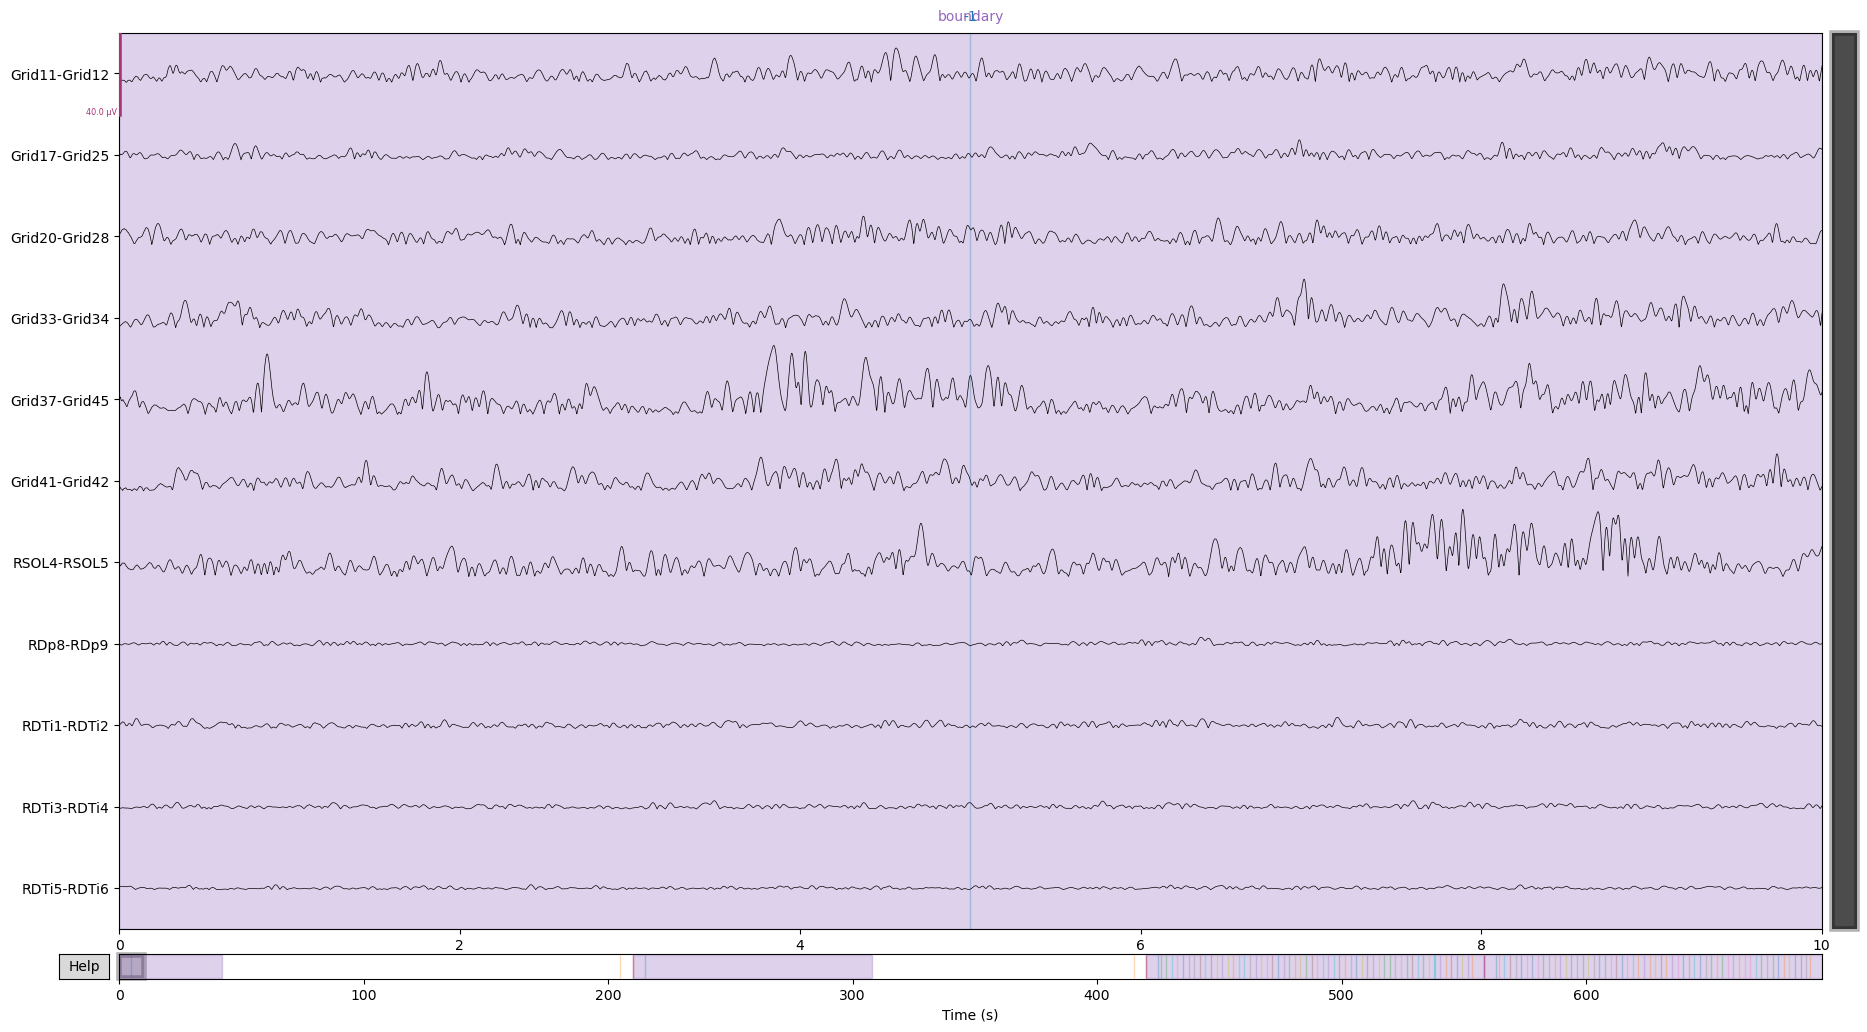

Channels marked as bad: none


In [12]:
%matplotlib qt
hfb.plot()

In [14]:
hfa_rest = hfb.copy().crop(tmin=150, tmax=350)
hfa_stim = hfb.copy().crop(tmin=450, tmax=650)

In [15]:
# Epoch rest and stim HFA
duration = 5
epochs_rest = mne.make_fixed_length_epochs(hfa_rest, duration=duration,overlap=0)
epochs_stim = mne.make_fixed_length_epochs(hfa_stim, duration=duration, overlap=0)

Not setting metadata
Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated


<Epochs |  40 events (good & bad), 0 - 4.998 sec, baseline off, ~47 kB, data not loaded,
 '1': 40>

Loading data for 39 events and 2500 original time points ...
    Using multitaper spectrum estimation with 2 DPSS windows


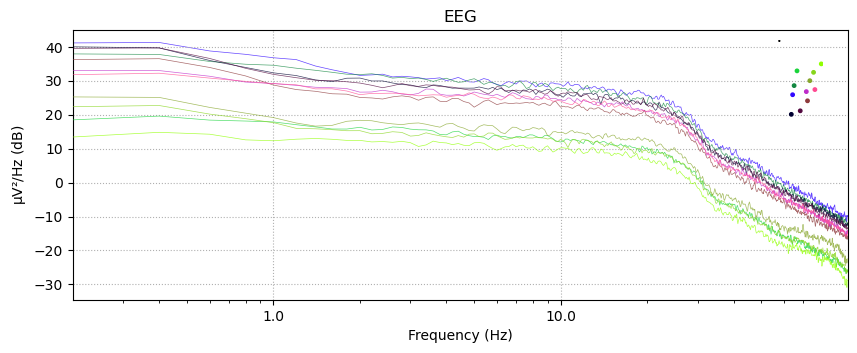

In [18]:
epochs_rest.plot_psd(fmin=0.1, fmax=100, bandwidth=0.5, xscale='log')

Loading data for 39 events and 2500 original time points ...
    Using multitaper spectrum estimation with 2 DPSS windows


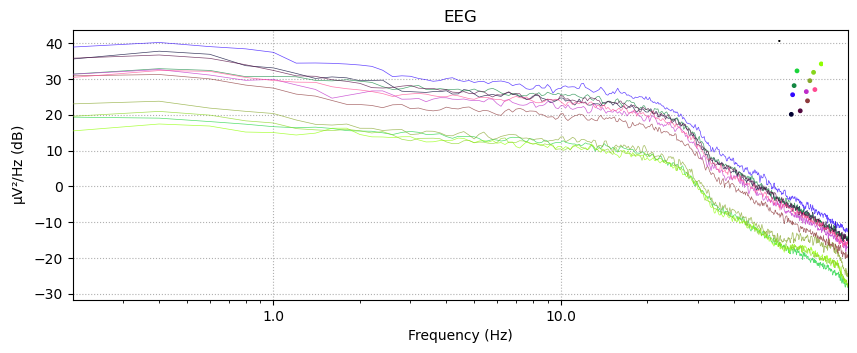

In [20]:
epochs_stim.plot_psd(fmin=0.1, fmax=100, bandwidth=0.5, xscale='log')

In [102]:
from mne.time_frequency import psd_multitaper

In [104]:
psd_multitaper(epochs_rest)

Loading data for 40 events and 2500 original time points ...
1 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


(array([[[1.44268436e-10, 3.46829629e-10, 3.37954752e-10, ...,
          2.17275317e-16, 1.47564785e-16, 6.63003574e-17],
         [1.04183936e-09, 1.57704839e-09, 1.20444786e-09, ...,
          5.20954706e-16, 5.47528290e-16, 2.38896094e-16],
         [5.27393101e-10, 1.19687656e-09, 9.92459052e-10, ...,
          2.02766321e-15, 1.96535188e-15, 7.55251944e-16],
         ...,
         [1.50148762e-10, 2.75661483e-10, 2.66848707e-10, ...,
          2.44647292e-15, 1.40852104e-15, 1.17600031e-15],
         [6.62696921e-11, 1.54629656e-10, 1.56811013e-10, ...,
          7.52390584e-17, 7.32397625e-17, 5.44992841e-17],
         [2.00136947e-11, 3.64571259e-11, 4.23538083e-11, ...,
          3.51431923e-17, 7.85698687e-18, 3.10475540e-18]],
 
        [[6.33132802e-11, 1.29839006e-10, 1.14941946e-10, ...,
          1.91362589e-16, 1.53767809e-16, 1.05392465e-16],
         [1.76011649e-09, 3.29424531e-09, 2.85232809e-09, ...,
          1.49421209e-15, 1.04599485e-15, 3.52042894e-16],
       

Observations: Taking longer time segments enable us to see more of resolution on the low frequency behavior of the HFA. But it is hard to see more detailed difference apart from the obvious face that power is higher during stimuli than during rest for visually responsive channels. I think this suggests that psd analysis is not so interesting to add to the result section. A psd analysis of GC is still interesting though as it enables us to check that power is concentrated in lower frequencies. The main points are that in each conditions and for each group:
* Power spectral density is concentrated in low frequencies of the HFA (less than 40Hz)
* Spectral GC is also concentrated in low frequencies
In fact the concentration of spectral GC in the low frequencies is the main interest here.
